# Lyric Cleaning
### This notebook aims to clean up the lyrics so that they can be used in the modeling phase. 

Some steps are:
- Removing puncutation
- Removing extra white-space
- Lowercasing all words
- Removing slang
- Removing abbreviations
- Translating some foreign words

In [1]:
import os
import numpy as np
import pandas as pd
import re
from PIL import Image
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
lyric_folders = ['be_the_cowboy',
                'retired_from_sad_new_career_in_business',
                'bury_me_at_makeout_creek',
                'lush',
                'puberty_2'
                ]

In [3]:
# Loading in song lyrics
song_rows = []
for folder in lyric_folders:
    lyric_files = os.listdir('lyrics/{}'.format(folder))
    for txt in lyric_files:
        album_name = txt.split('-')[1].strip()
        song_name = txt.split('-')[2].replace('.txt','').strip()
        try:
            with open('lyrics/{}/{}'.format(folder, txt), 'r') as txt:
                lyrics = txt.readlines()
            song_dict = {'album': album_name, 'song': song_name, 'lyrics': lyrics}
            song_rows.append(song_dict)
        except:
            print('Error: {} does not exist'.format(txt))

In [4]:
lyric_df = pd.DataFrame(data = song_rows)[['album', 'song', 'lyrics']]

In [5]:
# Remove any blank songs
lyric_df['lines'] = lyric_df['lyrics'].apply(lambda x: len(x)) 
lyric_df = lyric_df.loc[lyric_df['lines'] != 0]

In [6]:
def lyric_cleanup(lyric_list):
    lyrics = lyric_list.copy()
    
    # Removing Puncutations and extra spaces
    lyrics = list(map(lambda x: re.sub('\[.+?\]', '', x), lyrics)) 
    lyrics = [l for l in lyrics if l != '\n']
    lyrics = list(map(lambda x: re.sub('\\n', ' \\n ', x), lyrics))
    
    lyrics = ''.join(lyrics)
    
    lyrics = lyrics.lower()
    
    lyrics = lyrics.replace(',','')
    lyrics = re.sub('\?|\,|\.|\"|!|;|,','', lyrics)
    
    #De-Slangifying
    lyrics = lyrics.replace("`","'")
    lyrics = lyrics.replace("’","'")
    lyrics = lyrics.replace("'round",'around')
    lyrics = lyrics.replace("'til",'until')
    lyrics = lyrics.replace("'cause",'because')
    lyrics = lyrics.replace("‘cause",'because')
    lyrics = lyrics.replace("'bout",'about')
    lyrics = lyrics.replace("-",' ')
    
    # Removing abbreviations for word embeddings
    lyrics = lyrics.replace("'d",' would')
    lyrics = lyrics.replace("n't",' not')
    lyrics = lyrics.replace("it's",'it is')
    lyrics = lyrics.replace("that's",'that is')
    lyrics = lyrics.replace("there's",'there is')
    lyrics = lyrics.replace("'s",' owns')
    lyrics = lyrics.replace("s'",' owns')
    lyrics = lyrics.replace("i'm",'i am')
    lyrics = lyrics.replace("they're",'they are')
    lyrics = lyrics.replace("didn't",'did not')
    lyrics = lyrics.replace("'ve",' have')
    lyrics = lyrics.replace("'ll",' will')
    lyrics = lyrics.replace("'re",' are')
    
    # Some Japanese words used that are translated
    lyrics = lyrics.replace("kuzurete",'crumble')
    lyrics = lyrics.replace("maeni",'before')
    
    
    return lyrics

In [7]:
lyric_df['l_str'] = lyric_df['lyrics'].apply(lyric_cleanup)

In [8]:
lyric_df[['album','song','l_str']].to_csv('mitski_lyrics.csv', index = False)

In [9]:
text = " ".join(lyric_df['l_str']).lower().replace('\n','')
text = re.sub('\[.+?]', '', text)

In [10]:
# Generating a word cloud

mask = np.array(Image.open('images/mitski-13.jpg'))
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(mask = mask, background_color='black', max_font_size=30, max_words=1000, color_func=image_colors).generate(text)


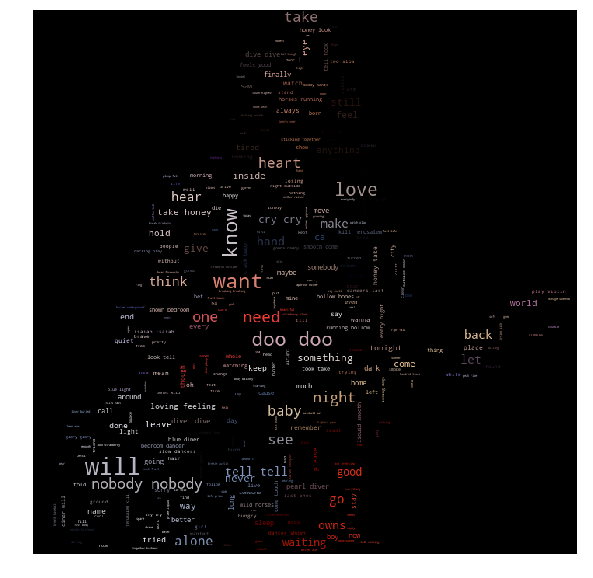

In [11]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
lyric_df[['album','song','l_str']].to_csv('mitski_lyrics.csv', index = False)

In [14]:
lyric_df

,album,song,lyrics,lines,l_str
0,Be the Cowboy,A Horse Named Cold Air,"[\n, \n, [Verse]\n, A lake with no fish\n, Is ...",15,a lake with no fish \n is the heart of a horse...
1,Be the Cowboy,A Pearl,"[\n, \n, [Verse 1]\n, You're growing tired of ...",39,you are growing tired of me \n you love me so ...
2,Be the Cowboy,Blue Light,"[\n, \n, [Verse 1]\n, Somebody kiss me, I'm go...",27,somebody kiss me i am going crazy \n i am walk...
3,Be the Cowboy,Come Into the Water,"[\n, \n, [Verse 1]\n, Come into the water\n, D...",21,come into the water \n do you wanna be my baby...
4,Be the Cowboy,Geyser,"[\n, \n, [Verse 1]\n, You're my number one\n, ...",30,you are my number one \n you are the one i wan...
5,Be the Cowboy,Lonesome Love,"[\n, \n, [Verse 1]\n, I call you, to see you a...",27,i call you to see you again \n so i can win an...
6,Be the Cowboy,Me and My Husband,"[\n, \n, [Verse 1]\n, I steal a few breaths fr...",40,i steal a few breaths from the world for a min...
7,Be the Cowboy,Nobody,"[\n, \n, [Verse 1]\n, My God, I'm so lonely\n,...",54,my god i am so lonely \n so i open the window ...
8,Be the Cowboy,Old Friend,"[\n, \n, [Verse 1]\n, We nearly drowned\n, For...",30,we nearly drowned \n for such a silly thing \n...
9,Be the Cowboy,Pink in the Night,"[\n, \n, [Verse 1]\n, I glow pink in the night...",27,i glow pink in the night in my room \n i have ...
